# Imports

In [8]:
# Reload modules before executing code
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import yaml 

from utils import (
    random_basins_subset,
    plot_basin_sample
)

# Get the current working directory (works for Jupyter or interactive environments)
project_dir = str(Path.cwd().parent.parent.parent)  # Adjust parent levels as needed
sys.path.append(project_dir)

from src.utils.plots import (
    get_cluster_files,
)

cluster_files = get_cluster_files()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
project_dir

'/home/ame805/torchHydroNodes'

# Constants

In [10]:
sample_fraction = 0.1

# Process Clusters

## Random selection

In [11]:
selected_basins_dict, non_selected_basins_dict, \
sample_file, basin_file = random_basins_subset(cluster_files, sample_fraction)

In [12]:
sample_file, basin_file

('random_sample_6clusters_10percent.csv', '59_basin_file_sample.txt')

## Plot selection

In [13]:
# Load data_dir.yml
with open(Path(project_dir) / 'src' / 'utils' / 'data_dir.yml', 'r') as f:
    data_dir_dict = yaml.load(f, Loader=yaml.FullLoader)

data_path = Path(project_dir).parent / data_dir_dict['data_dir_camelsus']

# Load the shape file
hm_catchment_path = data_path  / data_dir_dict['hm_catchment_file']

# Load the shape file
map_shape_path = data_path  / data_dir_dict['map_shape_file']

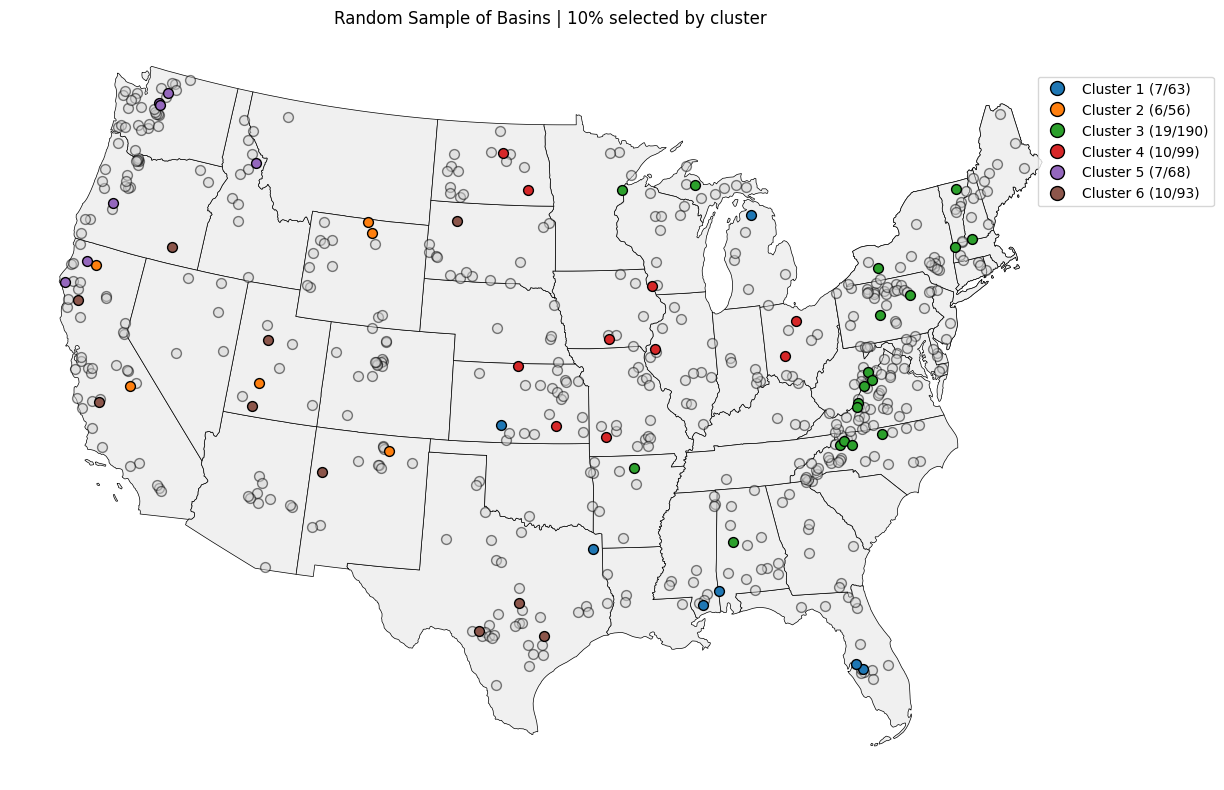

In [14]:
plot_basin_sample(selected_basins_dict, non_selected_basins_dict, 
                         hm_catchment_path, map_shape_path)